In [114]:
%matplotlib inline
from __future__ import division
import cvxpy as cvx
import matplotlib.pyplot as plt
import numpy as np

In [115]:
# Generate data for SVM classifier with L1 regularization.
np.random.seed(1)
n = 20
m = 1000
TEST = m
DENSITY = 0.2
beta_true = np.random.randn(n,1)
idxs = np.random.choice(range(n), int((1-DENSITY)*n), replace=False)
for idx in idxs:
    beta_true[idx] = 0
offset = 0
sigma = 45
X = np.random.normal(0, 5, size=(m,n))
Y = np.sign(X.dot(beta_true) + offset + np.random.normal(0,sigma,size=(m,1)))
X_test = np.random.normal(0, 5, size=(TEST,n))
Y_test = np.sign(X_test.dot(beta_true) + offset + np.random.normal(0,sigma,size=(TEST,1)))

In [116]:
# unique = np.unique(Y)
# Y = Y.squeeze()

# COLOR = ['red', 'blue']
# for li in range(len(unique)):
#     X_sub = X[Y == unique[li]]
#     plt.scatter(X_sub[:, 0],X_sub[:, 1], c=COLOR[li])
# plt.show()

In [117]:
# Form SVM with L1 regularization problem.
beta = cvx.Variable(n)
v = cvx.Variable()
loss = cvx.sum_entries(cvx.pos(1 - cvx.mul_elemwise(Y, X*beta - v)))
reg = cvx.norm(beta, 1)
lambd = cvx.Parameter(sign="positive")
prob = cvx.Problem(cvx.Minimize(loss/m + lambd*reg))

In [127]:
# Compute a trade-off curve and record train and test error.
# TRIALS = 100
train_error = np.zeros(TRIALS)
test_error = np.zeros(TRIALS)
# lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []
lambd.value = 0.27185882427329416
prob.solve(verbose=True)
train_error[i] = (np.sign(X.dot(beta_true) + offset) != np.sign(X.dot(beta.value) - v.value)).sum()/m
test_error[i] = (np.sign(X_test.dot(beta_true) + offset) != np.sign(X_test.dot(beta.value) - v.value)).sum()/TEST
beta_vals.append(beta.value)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +1.169e-01  +3.880e+00  +4e+01  9e-01  6e-01  1e+00  2e-02    ---    ---    1  1  - |  -  - 
 1  +1.298e+00  +2.211e+00  +1e+01  1e-01  2e-01  2e-01  5e-03  0.7632  3e-02   0  0  0 |  0  0
 2  +9.058e-01  +1.067e+00  +3e+00  3e-02  3e-02  2e-02  2e-03  0.7502  7e-02   0  0  0 |  0  0
 3  +9.223e-01  +9.587e-01  +9e-01  6e-03  5e-03  5e-03  4e-04  0.8070  9e-02   0  0  0 |  0  0
 4  +9.210e-01  +9.358e-01  +4e-01  3e-03  2e-03  2e-03  2e-04  0.6130  6e-02   0  0  0 |  0  0
 5  +9.212e-01  +9.304e-01  +2e-01  2e-03  1e-03  1e-03  1e-04  0.4426  2e-01   0  0  0 |  0  0
 6  +9.217e-01  +9.250e-01  +9e-02  6e-04  4e-04  3e-04  4e-05  0.6877  8e-02   0  0  0 |  0  0
 7  +9.219e-01  +9.235e-01  +4e-02  3e-04  2e-04  1e-04  2e-05  0.5814  1e-01   1  0  0 |  0  0
 8  +9.221e-01  +9.225e-01  +1e-02  7e-05  5e-

In [130]:
beta.value

matrix([[  1.86015730e-11],
        [  5.31816132e-12],
        [ -8.32755157e-12],
        [ -2.04221309e-12],
        [  2.51396619e-02],
        [ -2.16731675e-11],
        [  4.58720316e-13],
        [ -3.70352894e-12],
        [ -1.16232371e-12],
        [ -1.76479031e-02],
        [ -1.35241520e-11],
        [ -1.12716598e-01],
        [ -2.20134483e-11],
        [  2.63714134e-11],
        [ -3.08996536e-12],
        [ -7.28301310e-12],
        [ -2.14912197e-12],
        [ -4.65174683e-02],
        [  7.82955607e-12],
        [  4.78778704e-12]])

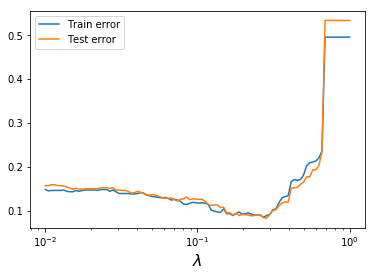

In [86]:
plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()